<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ShuaiGuo16/Matplotllib_Animation_Tutorial/blob/master/Tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
</table>

# Introduction

In this notebook, we will walk through an animation project by using Matplotlib and Celluloid, which is a Python package that simplifies the animation creation in Matplotlib. The target animation we will create displays various projectile motion trajectories and updates the associated histogram of the projectile shoting range. 

This animation is intended to show the audiences the *uncertainty* of the projectile shoting range under various combinations of initial projectile velocity and shooting angle. This type of visualization is also known as the **hypohetical outcome plots**, which is a powerful technique that is especially good at delivering intuitive and effective *uncertainty visualization*. To learn more about hypohetical outcome plots, take a look at this article:

[Uncertainty Visualization Made Easy With Hypothetical Outcome Plots](https://towardsdatascience.com/uncertainty-visualization-made-easy-with-hypothetical-outcome-plots-89558574d069)

# Packages

To create the desired animation, we will use `Celluloid` module. Using `Celluloid` involves the following steps:

1. Create a blank plot object;
2. Create a “camera” that gets attached to the plot;
3. Create each frame of the animation;
4. Take a snapshot with the camera at each frame;
5. Transform all the snapshots into an animation.

To install `Celluloid`, use

```pip install celluloid```

In addition, to display the created animation within the Jupyter notebook, we need to import `HTML` from `IPython.display`.

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera

%matplotlib inline
np.set_printoptions(precision=2,suppress=True)
np.random.seed(42)

# Data

For creating the animation, we will simply load the pre-calculated projectile trajectory data: two Numpy 2D arrays that record the $x$ coordinates and $y$ coordinates of the projectile trajectories, respectively. 

In [31]:
# Load trajectory data
traj_X = np.genfromtxt('./Dataset/traj_X.csv', delimiter=',')
traj_Y = np.genfromtxt('./Dataset/traj_Y.csv', delimiter=',')
print(traj_X.shape)
print(traj_Y.shape)

(1000, 20)
(1000, 20)


Both numpy arrays have 1000 rows, corresponding to 1000 different trajectories. Each trajectory is discretized with 20 points, thus the numpy arrays have 20 columns. One sample trajectory is shown below.

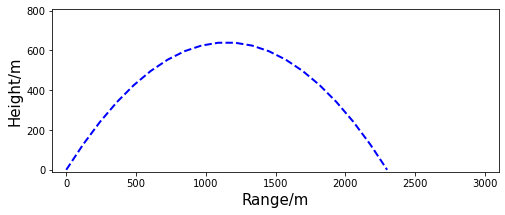

In [32]:
# Display a single trajectory
fig, ax = plt.subplots(figsize=(8,3))

pick_traj = 5
ax.plot(traj_X[pick_traj,:],traj_Y[pick_traj,:],
       color='b', lw=2, linestyle='--')
ax.set(xlim=(-100, 3100), ylim=(-10, 810))
ax.set_xlabel('Range/m', fontsize=15)
ax.set_ylabel('Height/m', fontsize=15);

# Animate a single trajectory

In the first step, we will create an animation that simulates a single trajectory. First, we will set up the graph using `Matplotlib` and initiate a `Camera` instance using the created graph. Later on, we will create 20 frames, where each frame depicts the current location of the projectile and its trajectory. We will use `Camera.snap()` to take a snapshot of the individual frames. 

In [52]:
# Animate a single trajectory
pick_traj = 5      # Select a trajectory to simulate

# Set up the graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlim=(-100, 3100), ylim=(-10, 810))
ax.set_ylabel('Height/m', fontsize=15)
ax.set_xlabel('Range/m', fontsize=15)
ax.get_xaxis().set_label_coords(0.5, 0.12)


# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(1,traj_X.shape[1]+1):
    
    # Projectile's trajectory
    x = traj_X[pick_traj][0:j]
    y = traj_Y[pick_traj][0:j]
    
    # Show Projectile's location
    ax.plot(x[-1], y[-1], marker='o', markersize=12, 
            markeredgecolor='r', markerfacecolor='r')
    
    # Show Projectile's trajectory
    ax.plot(x, y, color='b', lw=2, linestyle='--')
    
    # Capture frame
    camera.snap()

# Stop the static plot from displaying
plt.close()

We call `Camera.animate()` to roll the captured snapshots up into an animation. Under the hood, `Camera.animate()` uses [`animation.ArtistAnimation()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.ArtistAnimation.html) from `Matplotlib`. In the following, we feed three parameters to `Camera.animate()`: 

- interval: number, controls the delay between frames in milliseconds.
- repeat: bool, controls whether the animation should repeat when the sequence of frames is completed.
- repeat_delay: number, if the animation in repeated, adds a delay in milliseconds before repeating the animation.

Finally, we display the created animation by using `HTML`.

In [53]:
# Create animation
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())

# Animate multiple trajectories

In the second step, we will create an animation that simulates multiple trajectories. For demonstration purpose, we will simulate the first 30 trajectories. The steps are the same as the last example. However, in this example, we will create $20 \times 30$ frames to capture all 30 trajectories.

In [54]:
# Animate multiple trajectories
traj_num = 30    # Simulate the first 30 trajectories

# Set up the graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlim=(-100, 3100), ylim=(-10, 810))
ax.set_ylabel('Height/m', fontsize=15)
ax.set_xlabel('Range/m', fontsize=15)
ax.set_xlabel('Range/m', fontsize=15)
ax.get_xaxis().set_label_coords(0.5, 0.12)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for i in range(1,traj_num+1):
    for j in range(1,coordinate_X.shape[1]+1):
    
        # Projectile's trajectory
        x = traj_X[i][0:j]
        y = traj_Y[i][0:j]
    
        # Show Projectile's location
        ax.plot(x[-1], y[-1], marker='o', markersize=12, 
            markeredgecolor='r', markerfacecolor='r')
    
        # Show Projectile's trajectory
        ax.plot(x, y, color='b', lw=2, linestyle='--')
    
        # Capture frame
        camera.snap()

# Stop the static plot from displaying
plt.close()

In [55]:
# Create animation
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())

# Appendix

### Physical background

In this case study, we consider a projectile motion problem and we are interested in calculating the shooting range $R$ of a cannon. For demonstration purpose, we choose a rather simple physical model to describe the trajectary of the cannonball, where the shooting range $R$ is calculated by:

\begin{equation}
R = \frac{v_0^2 sin 2 \theta}{g},
\end{equation}

where $v_0$ is the initial velocity of the cannonball, $\theta$ is the shooting angle, and $g=9.8m/s^2$ is the gravity acceleration. An illustration of the current problem is shown below.

<img src="./Image/Cannon_Illustration.png" width=500 height=300 />

### Uncertainty analysis

Suppose that we are not sure about the values of $v_0$ and $\theta$, as they can be influenced by randomness in practice. To describe their uncertainty, we assign a probability distribution for $v_0$ and $\theta$, respectively. Specifically, we assume:

- $v_0$ follows a normal distribution, i.e., $v_0 \sim \mathcal{N}(150,5^2)$. This distribution indicates that the mean value of $v_0$ is $150m/s$ and the standard deviation value of $v_0$ is $5m/s$;

- $\theta$ follows a uniform distribution, i.e., $\theta \sim \mathcal{U}(40,50)$. This distribution indicates that $\theta$ can take any value between $40^{o}$ and $50^{o}$ with equal probability.

Due to the uncertainty embedded in the model parameters ($v_0$ and $\theta$), the cannon trajectory and its shooting range $R$ will also be uncertain. To quantify their uncertainties, we can perform [Monte Carlo simulations]((https://towardsdatascience.com/how-to-quantify-the-prediction-error-made-by-my-model-db4705910173)).

In [2]:
# Define trajectory calculation function
def traj_cal(v0, theta, g, time_step=10):
    '''Calculate the cannonball trajectory
    Inputs:
        v0 --> initial velocity of the cannonball
        theta --> shooting angle (in degree)
        g --> gravity acceleration
        time_step --> time discretization
    Outputs:
        coor_X --> X coordinates of the cannonball
        coor_Y --> Y coordinates of the cannonball'''
    
    # Time for the cannonball to reach maximum height
    t_c = v0*np.sin(theta/180*np.pi)/g
    
    # Time discretization
    t = np.linspace(start=0, stop=2*t_c, num=time_step)
    coor_X, coor_Y = [], []
    
    # Calculate trajectory
    for time in t:
        coor_X.append(v0*np.cos(theta/180*np.pi)*time)
        if time <= t_c:
            coor_Y.append(v0*np.sin(theta/180*np.pi)*time-0.5*g*time**2)
        else:
            coor_Y.append(v0*np.sin(theta/180*np.pi)*t_c-0.5*g*t_c**2-0.5*g*(time-t_c)**2)
    
    return coor_X, coor_Y

In [7]:
# Monte Carlo simulations
MC_sample_num = 1000
time_step = 20      # Time discretization
traj_X, traj_Y = [], []

# Parameters
v0 = np.random.normal(loc=150, scale=5, size=MC_sample_num)
theta = 10*np.random.rand(MC_sample_num)+40
g = 9.8

for i in range(MC_sample_num):
    coor_X, coor_Y= traj_cal(v0[i], theta[i], g, time_step)
    
    traj_X.append(coor_X)
    traj_Y.append(coor_Y)

# Save calculation results
traj_X = np.array(traj_X)
traj_Y = np.array(traj_Y)
np.savetxt("./Dataset/traj_X.csv", traj_X, delimiter=",")
np.savetxt("./Dataset/traj_Y.csv", traj_Y, delimiter=",")

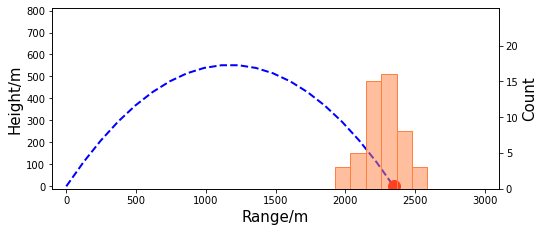

In [8]:
# Display trajectories in animation
fig = plt.figure(figsize=(8,4))
ax_show = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax_hide = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1)
ax_rep = ax_show.twinx()

ax_show.set(xlim=(-100, 3100), ylim=(-10, 810))
ax_show.set_xlabel('Range/m', fontsize=15)
ax_show.set_ylabel('Height/m', fontsize=15)

# A work-around to prevent cropping the labels when saving gif
ax_hide.axis('off')

ax_rep.set_ylim(0, 25.2)
ax_rep.set_yticks(list(range(0,25,5)))
ax_rep.set_ylabel('Count', fontsize=15)

# Initiate camera
camera = Camera(fig)

for i in range(traj_num):
    for j in range(time_step):
        
        # Add trajectory
        x = traj_X[i][0:j+1]
        y = traj_Y[i][0:j+1]
        ax_show.plot(x, y, color='b', lw=2, linestyle='--')
        ax_show.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')
        
        # Add histogram
        if i==0:
            if j==time_step-1:
                ax_rep.hist(Range[i], bins=bins, edgecolor=(1.0, 0.5, 0.25),fc=(1.0, 0.5, 0.25, 0.5))
        else:
            if j==time_step-1:
                ax_rep.hist(Range[0:i+1], bins=bins, edgecolor=(1.0, 0.5, 0.25),fc=(1.0, 0.5, 0.25, 0.5))
            else: 
                ax_rep.hist(Range[0:i], bins=bins, edgecolor=(1.0, 0.5, 0.25),fc=(1.0, 0.5, 0.25, 0.5))
        # Capture frame
        camera.snap()

anim = camera.animate(interval = 40, repeat = False, repeat_delay = 500)